# Comparativa de rendimiento JAX / TF / PT

En este ejercicio vamos a comparar 3 librerías distintas especializadas en el Machine Learning
* Tensorflow
* Pytorch
* Jax

<br>

**TensorFlow:** Fue lanzada por Google en 2015, es una plataforma de extremo a extremo que destaca por su robustez en entornos de producción. Gracias a su integración con *Keras*, permite diseñar redes neuronales de forma sencilla, manteniendo un control total sobre la arquitectura. Su mayor ventaja es la versatilidad de despliegue, permitiendo ejecutar modelos desde navegadores web hasta dispositivos móviles.

<br>

**PyTorch:** Fue desarrollada por el laboratorio de IA de Meta en 2016, se convirtió rápidamente en la favorita de la comunidad académica. Es la herramienta estándar para proyectos de visión por computadora y procesamiento de lenguaje natural.

<br>

**JAX + Flax:** También es de Google, Jax es una herramienta de computación numérica de alto rendimiento. Combina la sintaxis familiar de NumPy con la capacidad de ejecutar operaciones en GPU y TPU de forma nativa. Al sumarle Flax, obtenemos un framework de redes neuronales increíblemente flexible y rápido.


<br><br>

#### Resumen:

| Característica | **TensorFlow** | **PyTorch** | **JAX + Flax** |
| :--- | :--- | :--- | :--- |
| **Creador** | Google | Meta (Facebook) | Google |
| **Lanzamiento** | 2015 | 2016 | 2018 (JAX) |
| **Enfoque principal** | Producción y despliegue masivo | Investigación y flexibilidad | Alto rendimiento y computación funcional |
| **Facilidad de uso** | Alta (usando Keras) | Muy Alta (Pythonic) | Media/Baja (Requiere lógica funcional) |
| **Ecosistema** | Muy robusto (TF Lite, TF.js, TFX) | Excelente (TorchVision, Hugging Face) | Creciendo (enfocado en investigación) |
| **Hardware ideal** | CPU, GPU, TPU | CPU, GPU | Optimizado para GPU y TPU |


<br><br>

Al final de esta prueba vemos los tiempos obtenidos:

<br>
<br>
<br>
<br>

---

## Prueba con TensorFlow

In [24]:
global_epochs = 15

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargamos MNIST (already splitted)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


# Convertimos los datos a decimales (obligatorio para redes neuronales) y normalizamos
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255



# Convertimos las etiquetas en One-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


# Creamos el modelo
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])


# Compilamos y entrenamos
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

import time
start_tf = time.time()
model.fit(
    X_train,
    y_train,
    epochs=global_epochs,
    batch_size=64,
    validation_data=(X_test, y_test)
)
end_tf = time.time()

tiempo_tf = end_tf - start_tf
print(f"Tiempo TensorFlow en {global_epochs} epochs: {tiempo_tf:.2f} segundos.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8902 - loss: 0.4012 - val_accuracy: 0.9739 - val_loss: 0.0860
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9808 - loss: 0.0673 - val_accuracy: 0.9817 - val_loss: 0.0553
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9871 - loss: 0.0416 - val_accuracy: 0.9850 - val_loss: 0.0459
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9907 - loss: 0.0312 - val_accuracy: 0.9854 - val_loss: 0.0449
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9852 - val_loss: 0.0449
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9947 - loss: 0.0177 - val_accuracy: 0.9869 - val_loss: 0.0430
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.9864 - val_loss: 0.0443
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9967 - loss: 0.0106 - val_accuracy: 0.

<br><br><br>

---

## Prueba con Pytorch

In [25]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision.datasets import MNIST
from torch.utils.data import random_split, Dataset, DataLoader

# transforms.ToTensor convierte la imagen de un objeto PIL/matriz (o cualquier tipo de objeto imagen) a un tensor
# normaliza automaticamente
transform = transforms.Compose([transforms.ToTensor()])



# Cargamos el modelo y separamos el entrenamiento del test (80% | 20%)
dataset = MNIST(root='data/', download=True, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size


# Separamos conjunto de entrenamiento del de pruebas
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"Total de datos de entrenamiento (X, y) {len(train_dataset)}")
print(f"Total de datos de prueba (X, y): {len(test_dataset)}")


# Preparamos la carga de datos con el DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=5 )
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Definimos el modelo, la función de pérdida y el optimizador

model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(32 * 13 * 13 , 64),
    nn.ReLU(),
    nn.Linear(64 , 10)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=model.parameters(), lr=0.001)


# Entrenamos el modelo (en pytorch no hay .fit hay que hacerlo manualmente)

import time
start_pt = time.time()
for epoch in range(global_epochs):

  for imagenes, etiquetas in train_loader:

    imagenes = imagenes.to(device)
    etiquetas = etiquetas.to(device)

    # Predicción
    outputs = model(imagenes)
    loss = criterion(outputs, etiquetas)

    # Backward (calculo de gradientes)
    optimizer.zero_grad()
    loss.backward()

    # Actualizamos los pesos
    optimizer.step()


  print(f"Epoch {epoch + 1} / {global_epochs}, Loss: {loss.item():.4f}")

end_pt = time.time()
tiempo_pt = end_pt - start_pt
print(f"Tiempo PyTorch en {global_epochs} epochs: {tiempo_pt:.2f} segundos.")


Total de datos de entrenamiento (X, y) 48000
Total de datos de prueba (X, y): 12000


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1 / 15, Loss: 0.2125
Epoch 2 / 15, Loss: 0.1463
Epoch 3 / 15, Loss: 0.1292
Epoch 4 / 15, Loss: 0.1083
Epoch 5 / 15, Loss: 0.0819
Epoch 6 / 15, Loss: 0.0697
Epoch 7 / 15, Loss: 0.0386
Epoch 8 / 15, Loss: 0.0331
Epoch 9 / 15, Loss: 0.0277
Epoch 10 / 15, Loss: 0.0201
Epoch 11 / 15, Loss: 0.0084
Epoch 12 / 15, Loss: 0.0030
Epoch 13 / 15, Loss: 0.0028
Epoch 14 / 15, Loss: 0.0018
Epoch 15 / 15, Loss: 0.0017
Tiempo PyTorch en 15 epochs: 112.94 segundos.


<br><br><br>

---

## Prueba con JAX

In [26]:
import jax
import jax.numpy as jnp
from flax import linen as nn
import optax
from flax.training.train_state import TrainState


# 1. Definimos la misma arquitectura que definimos en tf
class RedJax(nn.Module):
  @nn.compact
  def __call__(self, x):
    x = nn.Conv(features=32, kernel_size=(3, 3))(x)
    x = nn.relu(x)
    x = nn.max_pool(x, window_shape=(2, 2), strides=(2, 2))
    x = x.reshape((x.shape[0], -1))  # Aplanamos
    x = nn.Dense(64)(x)
    x = nn.relu(x)
    x = nn.Dense(10)(x)
    return x


# 2. Función de entrenamiento optimizada con jit
@jax.jit
def train_step(state, x, y):
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, x)
        labels_one_hot = jax.nn.one_hot(y, 10)
        return optax.softmax_cross_entropy(logits, labels_one_hot).mean()

    # Calcula cuánto hay que mover los pesos (gradientes)
    loss, grads = jax.value_and_grad(loss_fn)(state.params)
    # Aplica el movimiento y nos da el "Estado 2"
    state = state.apply_gradients(grads=grads)
    return state, loss





# --- PREPARACIÓN PREVIA (Fuera del tiempo de ejecución) ---
# Usamos X_train y y_train del bloque de TensorFlow
# Aseguramos que tengan la forma correcta: (60000, 28, 28, 1)
X_train_jax = jnp.array(X_train).reshape(-1, 28, 28, 1)
y_train_jax = jnp.array(y_train).argmax(axis=1) # Convertir de One-hot a índice



# 3. Inicializacion del model
modelo = RedJax()
variables = modelo.init(jax.random.PRNGKey(0), jnp.ones([1, 28, 28, 1]))
state = TrainState.create(
    apply_fn=modelo.apply,
    params=variables['params'],
    tx=optax.adam(0.001)
)

# 4. Bucle de entrenamiento
print("Iniciando entrenamiento")

inicio_jax = time.time()
batch_size = 64
for epoch in range(global_epochs):
    for i in range(0, len(X_train_jax), batch_size):
        x_batch = X_train_jax[i : i + batch_size]
        y_batch = y_train_jax[i : i + batch_size]

        state, loss = train_step(state, x_batch, y_batch)

    # Forzamos a JAX a esperar a la GPU para medir el tiempo real
    jax.block_until_ready(loss)
    print(f"Epoch {epoch + 1} finalizada")

fin_jax = time.time()

tiempo_jax = fin_jax - inicio_jax

print(f"Tiempo JAX en {global_epochs} epochs: {tiempo_jax:.2f} segundos.")


Iniciando entrenamiento
Epoch 1 finalizada
Epoch 2 finalizada
Epoch 3 finalizada
Epoch 4 finalizada
Epoch 5 finalizada
Epoch 6 finalizada
Epoch 7 finalizada
Epoch 8 finalizada
Epoch 9 finalizada
Epoch 10 finalizada
Epoch 11 finalizada
Epoch 12 finalizada
Epoch 13 finalizada
Epoch 14 finalizada
Epoch 15 finalizada
Tiempo JAX en 15 epochs: 22.11 segundos.


<br><br>

---

# Tiempos

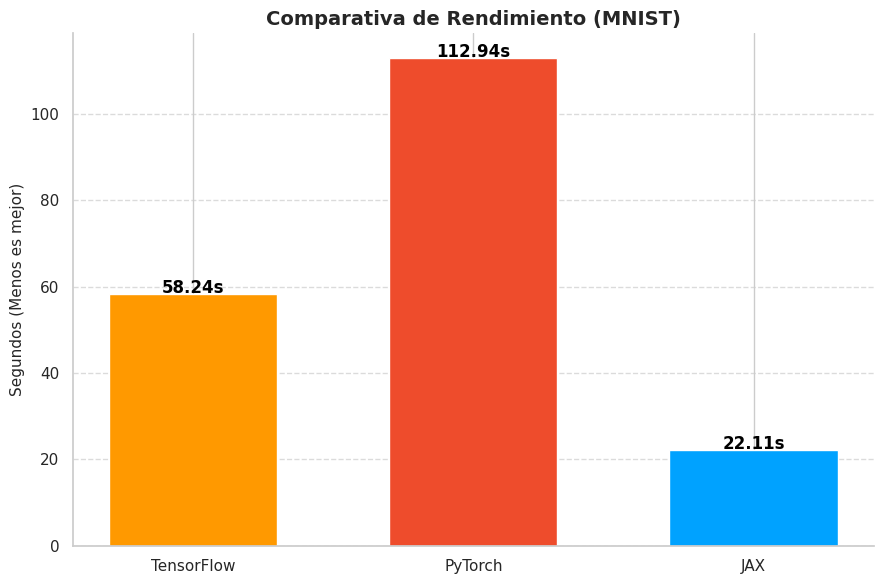

In [27]:
tiempos = {
    "TensorFlow": tiempo_tf,
    "PyTorch": tiempo_pt,
    "JAX": tiempo_jax
}


# 2. Configuración estética
plt.figure(figsize=(9, 6))
colores = ["#FF9900", "#EE4C2C", "#00A2FF"] # Colores oficiales de cada uno


# 3. Creación del grafico
barras = plt.bar(
    tiempos.keys(),
    tiempos.values(),
    color=colores,
    width=0.6
  )


# 4. Añadir los segundos exactos encima de cada barra
for barra in barras:
    y = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, y + 0.2, f'{y:.2f}s',
             ha='center', fontweight='bold', color='black')



# 5. Títulos y limpieza de bordes
plt.title("Comparativa de Rendimiento (MNIST)", fontsize=14, fontweight='bold')
plt.ylabel("Segundos (Menos es mejor)", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Rejilla sutil
plt.gca().spines['top'].set_visible(False)    # Quitar borde superior
plt.gca().spines['right'].set_visible(False)  # Quitar borde derecho

plt.tight_layout()
plt.show()